# **MINOR PROJECT**

---






In [ ]:
import pandas as pd
wine=pd.read_csv('/content/winedataset.zip')
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#number of rows and colums before handling
wine.shape

(1143, 13)

# **TASK 1** - Exploratory Data Analysis



Identification and Handling of missing values and duplicate records in the dataset

In [ ]:
#checking for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
#checking for duplicate records
wine.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [ ]:
#removing duplicated values
wine.drop_duplicates()
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [ ]:
#number of rows and colums after handling
wine.shape

(1143, 13)

Summarizing analysis and observation

There are no missing and duplicate values in the given data set.


Distribution of different input variables (chemical properties). How does the alcohol content vary across different quality categories?

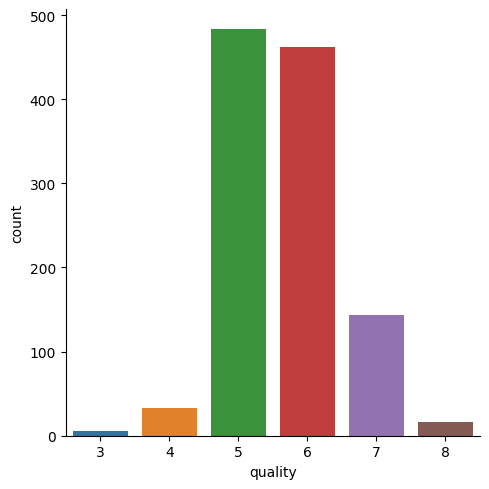

In [ ]:
# HOW ARE DIFFERENT INPUT VARIABLES DISTRIBUTED
# Number of values for each quality
sns.catplot(x='quality', data = wine, kind = 'count')

<Axes: xlabel='quality', ylabel='alcohol'>

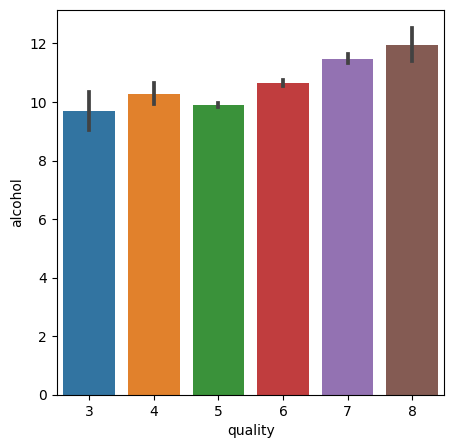

In [ ]:
# Alcohol Content vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

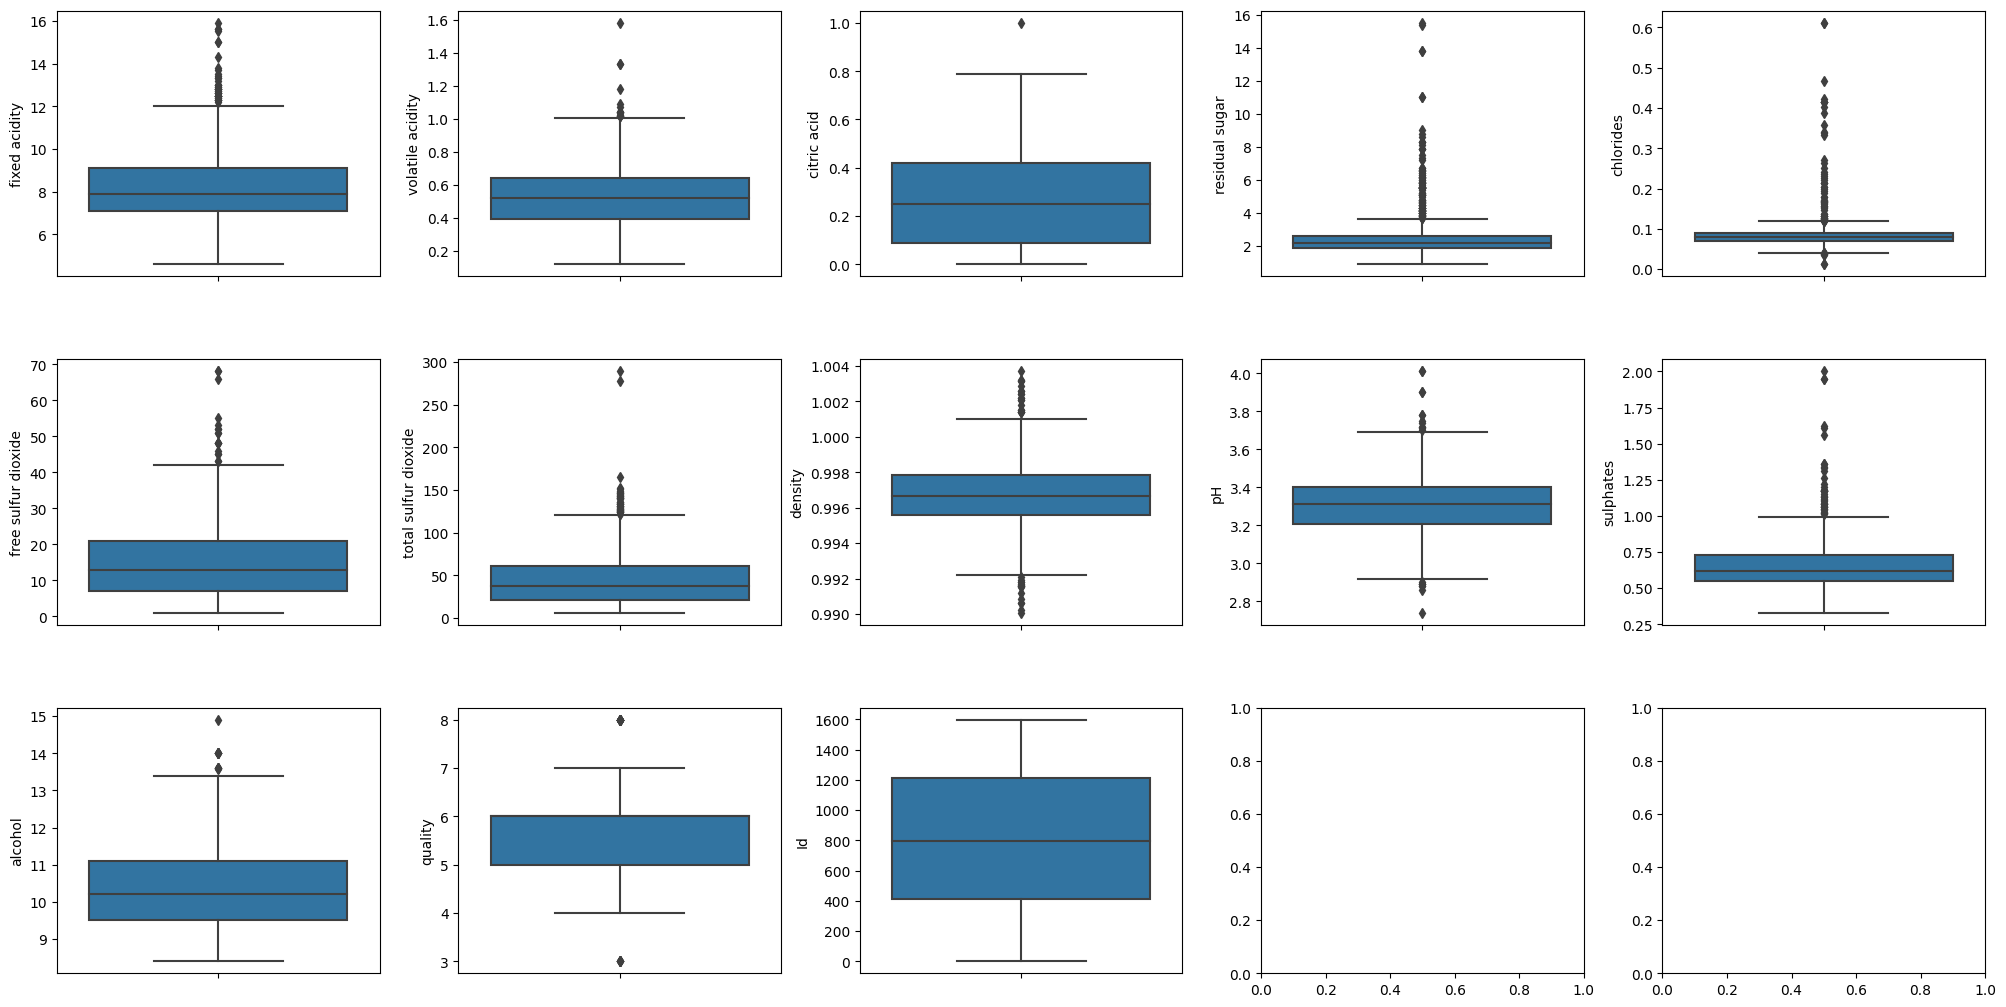

In [ ]:
# creating box plots
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
  if col != 'type':
    sns.boxplot(y=col, data=wine, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Summarizing analysis and observations

The barplot shows variation of alcohol content with quality

The box plots show distribution of different variables, the outliners are also clearly visible in the boxplots. Removing the ouliners can improve the model accuracy only by a few percent which will not make much difference.

Correlation between the input variables and the quality score:

correlation

Positive Correlation - directly propotional

Negative Correlation - inversly propotional

In [ ]:
correlation = wine.corr()

<Axes: >

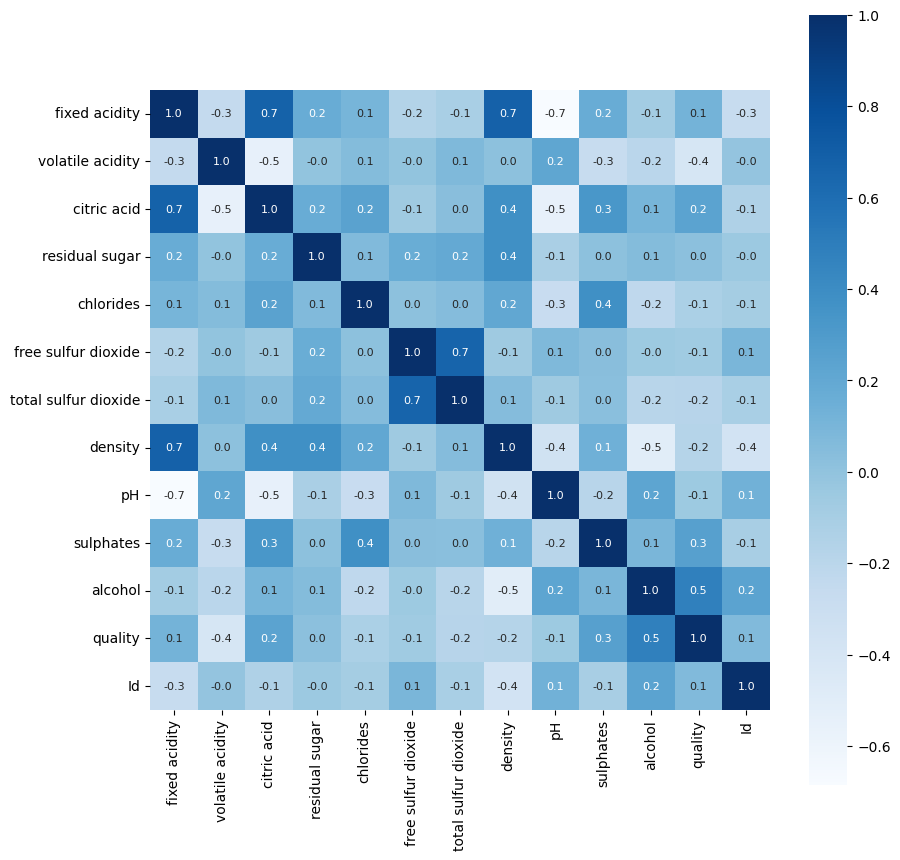

In [ ]:
#Constructing heatmap to understand correlation between input variables and quality
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

Summarizing analysis and observation:

The heatmap shows the correlation of all columns in the given dataset,

this can be used to study the correlation between quality and other input variables.

According to the colour bar on the right

Darkest blue colour has the most +ve value (+1) hence showing strongest correlation

All positive values indicate directly proptional relation

All negative values indicate inversly propotional relation

This means Alcohol is strongly related to quality and is directly related, volatile acidity is most negatively related to quality(-0.4) hence inversly propotional.



Range and distribution of each input variable:


In [ ]:
# to find range of each variable
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [ ]:
# Calculate range of each input variable
input_variables=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for variable in input_variables:
  min_value=wine[variable].min()
  max_value=wine[variable].max()

  print(f"{variable}: Range = {min_value} - {max_value}")

fixed acidity: Range = 4.6 - 15.9
volatile acidity: Range = 0.12 - 1.58
citric acid: Range = 0.0 - 1.0
residual sugar: Range = 0.9 - 15.5
chlorides: Range = 0.012 - 0.611
free sulfur dioxide: Range = 1.0 - 68.0
total sulfur dioxide: Range = 6.0 - 289.0
density: Range = 0.99007 - 1.00369
pH: Range = 2.74 - 4.01
sulphates: Range = 0.33 - 2.0
alcohol: Range = 8.4 - 14.9


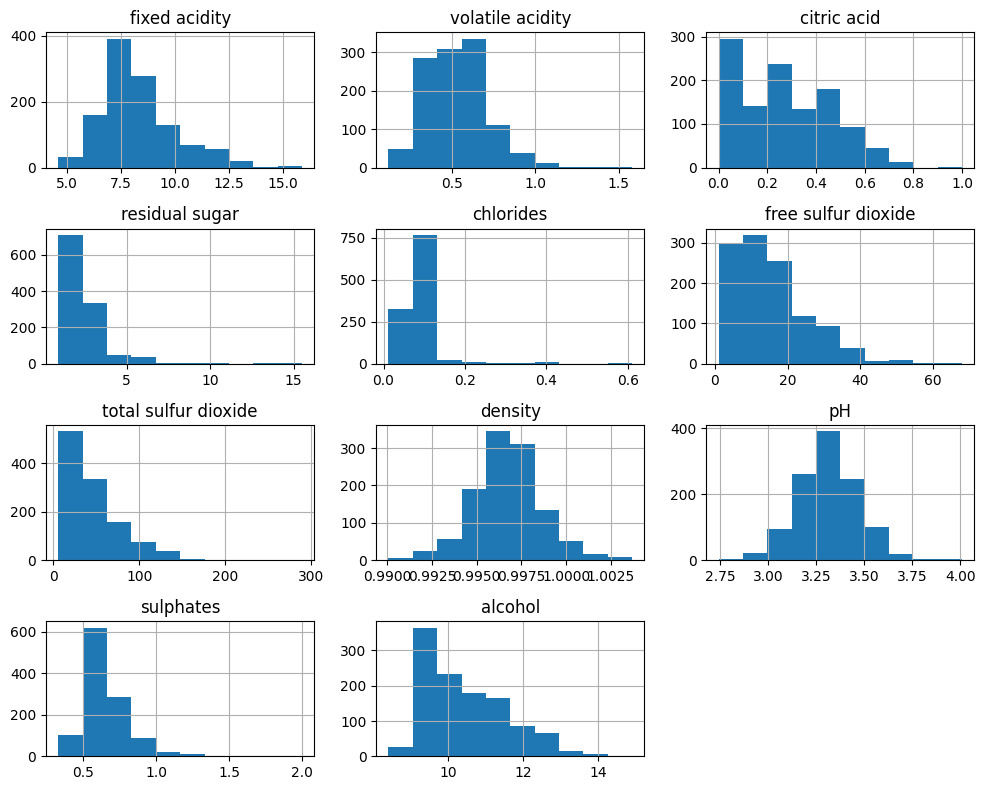

In [ ]:
# collecting the distribution data at a place
wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
].hist(bins=10, figsize=(10,8))
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

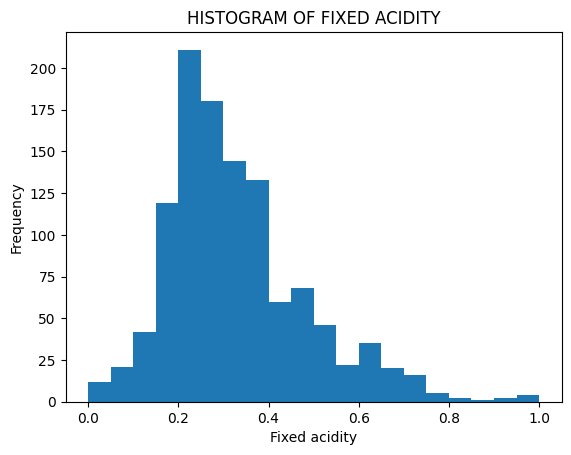

In [ ]:
#for distribution, plotting histograms

# plot a histogram for'fixed acidity'
plt.hist(wine['fixed acidity'],bins=20)
plt.xlabel('Fixed acidity')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF FIXED ACIDITY')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

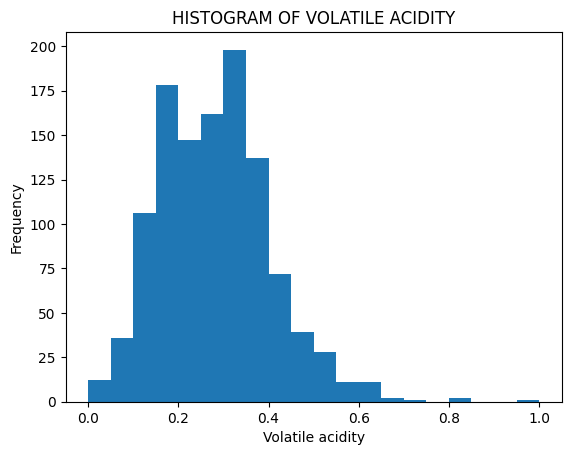

In [ ]:
# plot a histogram for'volatile acidity'
plt.hist(wine['volatile acidity'],bins=20)
plt.xlabel('Volatile acidity')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF VOLATILE ACIDITY')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

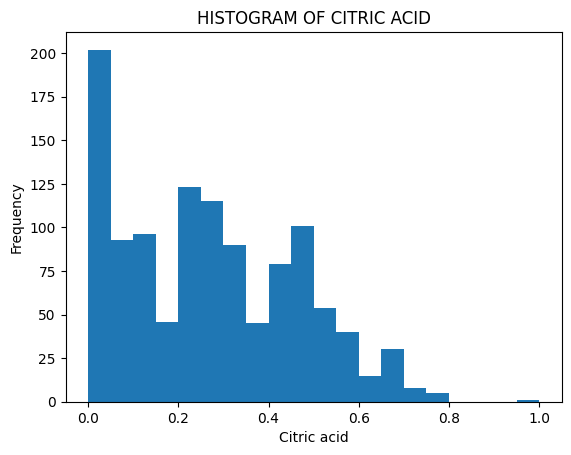

In [ ]:
# plot a histogram for'citric acid'
plt.hist(wine['citric acid'],bins=20)
plt.xlabel('Citric acid')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF CITRIC ACID')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

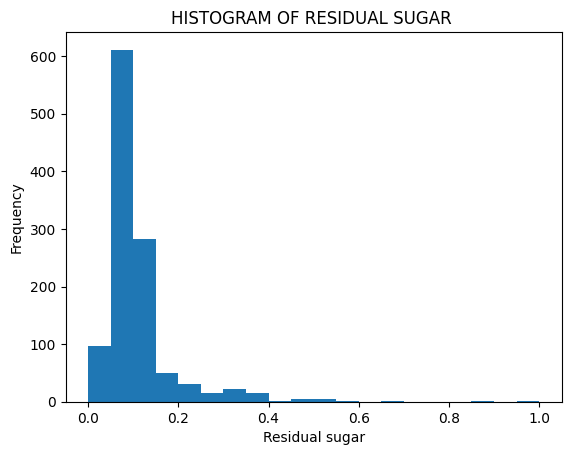

In [ ]:
# plot a histogram for'residual sugar'
plt.hist(wine['residual sugar'],bins=20)
plt.xlabel('Residual sugar')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF RESIDUAL SUGAR ')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

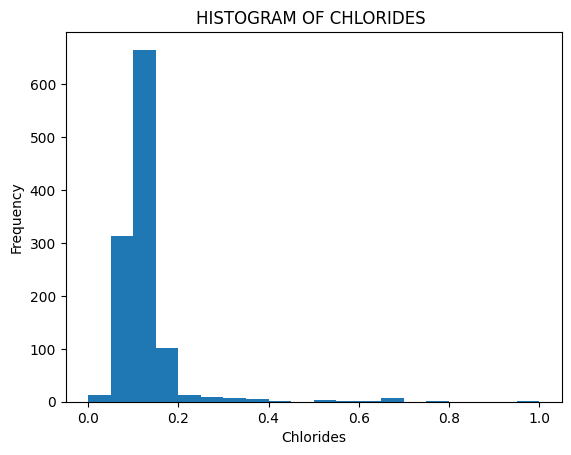

In [ ]:
# plot a histogram for'chlorides'
plt.hist(wine['chlorides'],bins=20)
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF CHLORIDES ')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

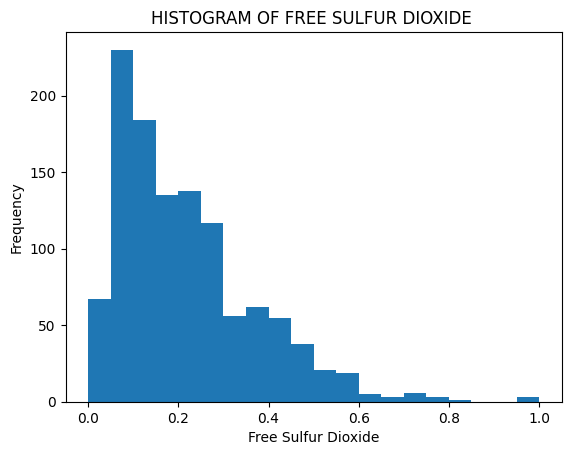

In [ ]:
# plot a histogram for'free sulfur dioxide'
plt.hist(wine['free sulfur dioxide'],bins=20)
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF FREE SULFUR DIOXIDE ')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

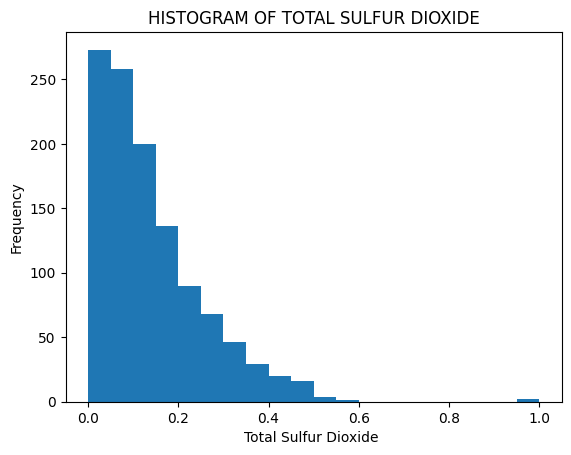

In [ ]:
# plot a histogram for'Sulfur Dioxidetotal sulfur dioxide'
plt.hist(wine['total sulfur dioxide'],bins=20)
plt.xlabel('Total Sulfur Dioxide ')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF TOTAL SULFUR DIOXIDE')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

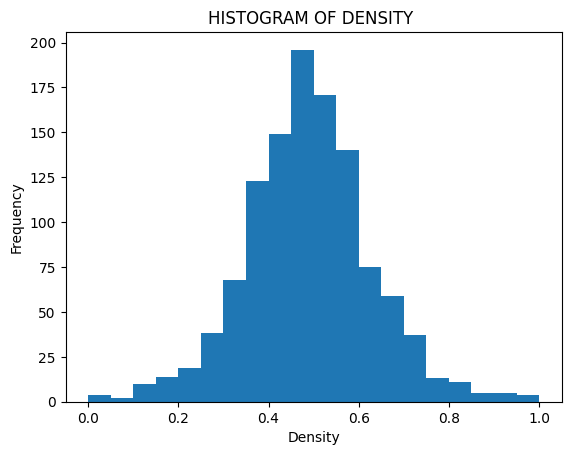

In [ ]:
# plot a histogram for'density'
plt.hist(wine['density'],bins=20)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF DENSITY ')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

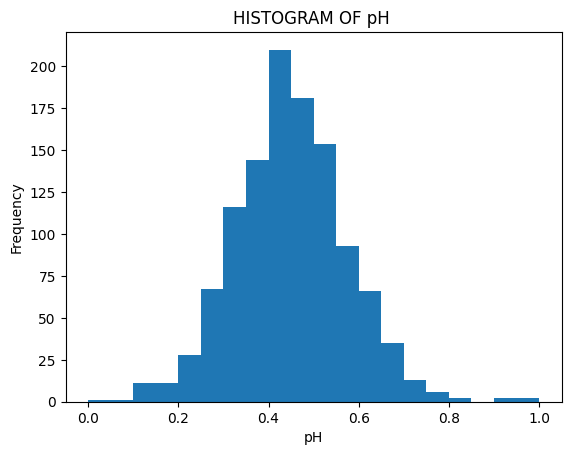

In [ ]:
# plot a histogram for'pH'
plt.hist(wine['pH'],bins=20)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF pH ')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

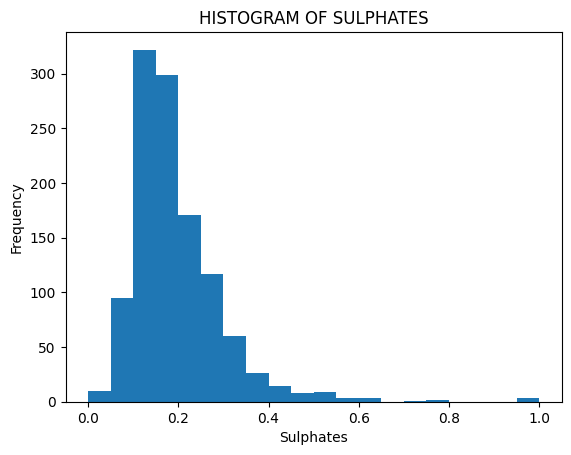

In [ ]:
# plot a histogram for'sulphates'
plt.hist(wine['sulphates'],bins=20)
plt.xlabel('Sulphates')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF SULPHATES')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

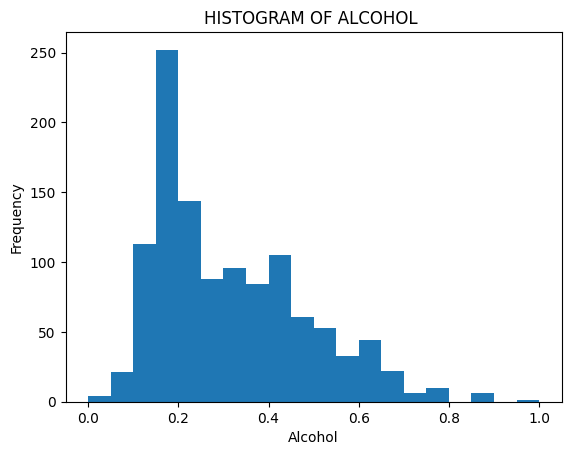

In [ ]:
# plot a histogram for'alcohol'
plt.hist(wine['alcohol'],bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('HISTOGRAM OF ALCOHOL ')
plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Perform Min-Max scaling on the identified variables
scaler = MinMaxScaler()
wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.fit_transform(wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

Summarizing analysis and observations

The describe command shows the min and max term from each column which indicates the range of different input variables

the distribution plot shows the distribution of each input variables

normalization using max absolute scaling and max-min scaling has been performed on distributions with large range

Relationship between pairs of input variables using scatter plots or heatmaps?
Observations and Trends:

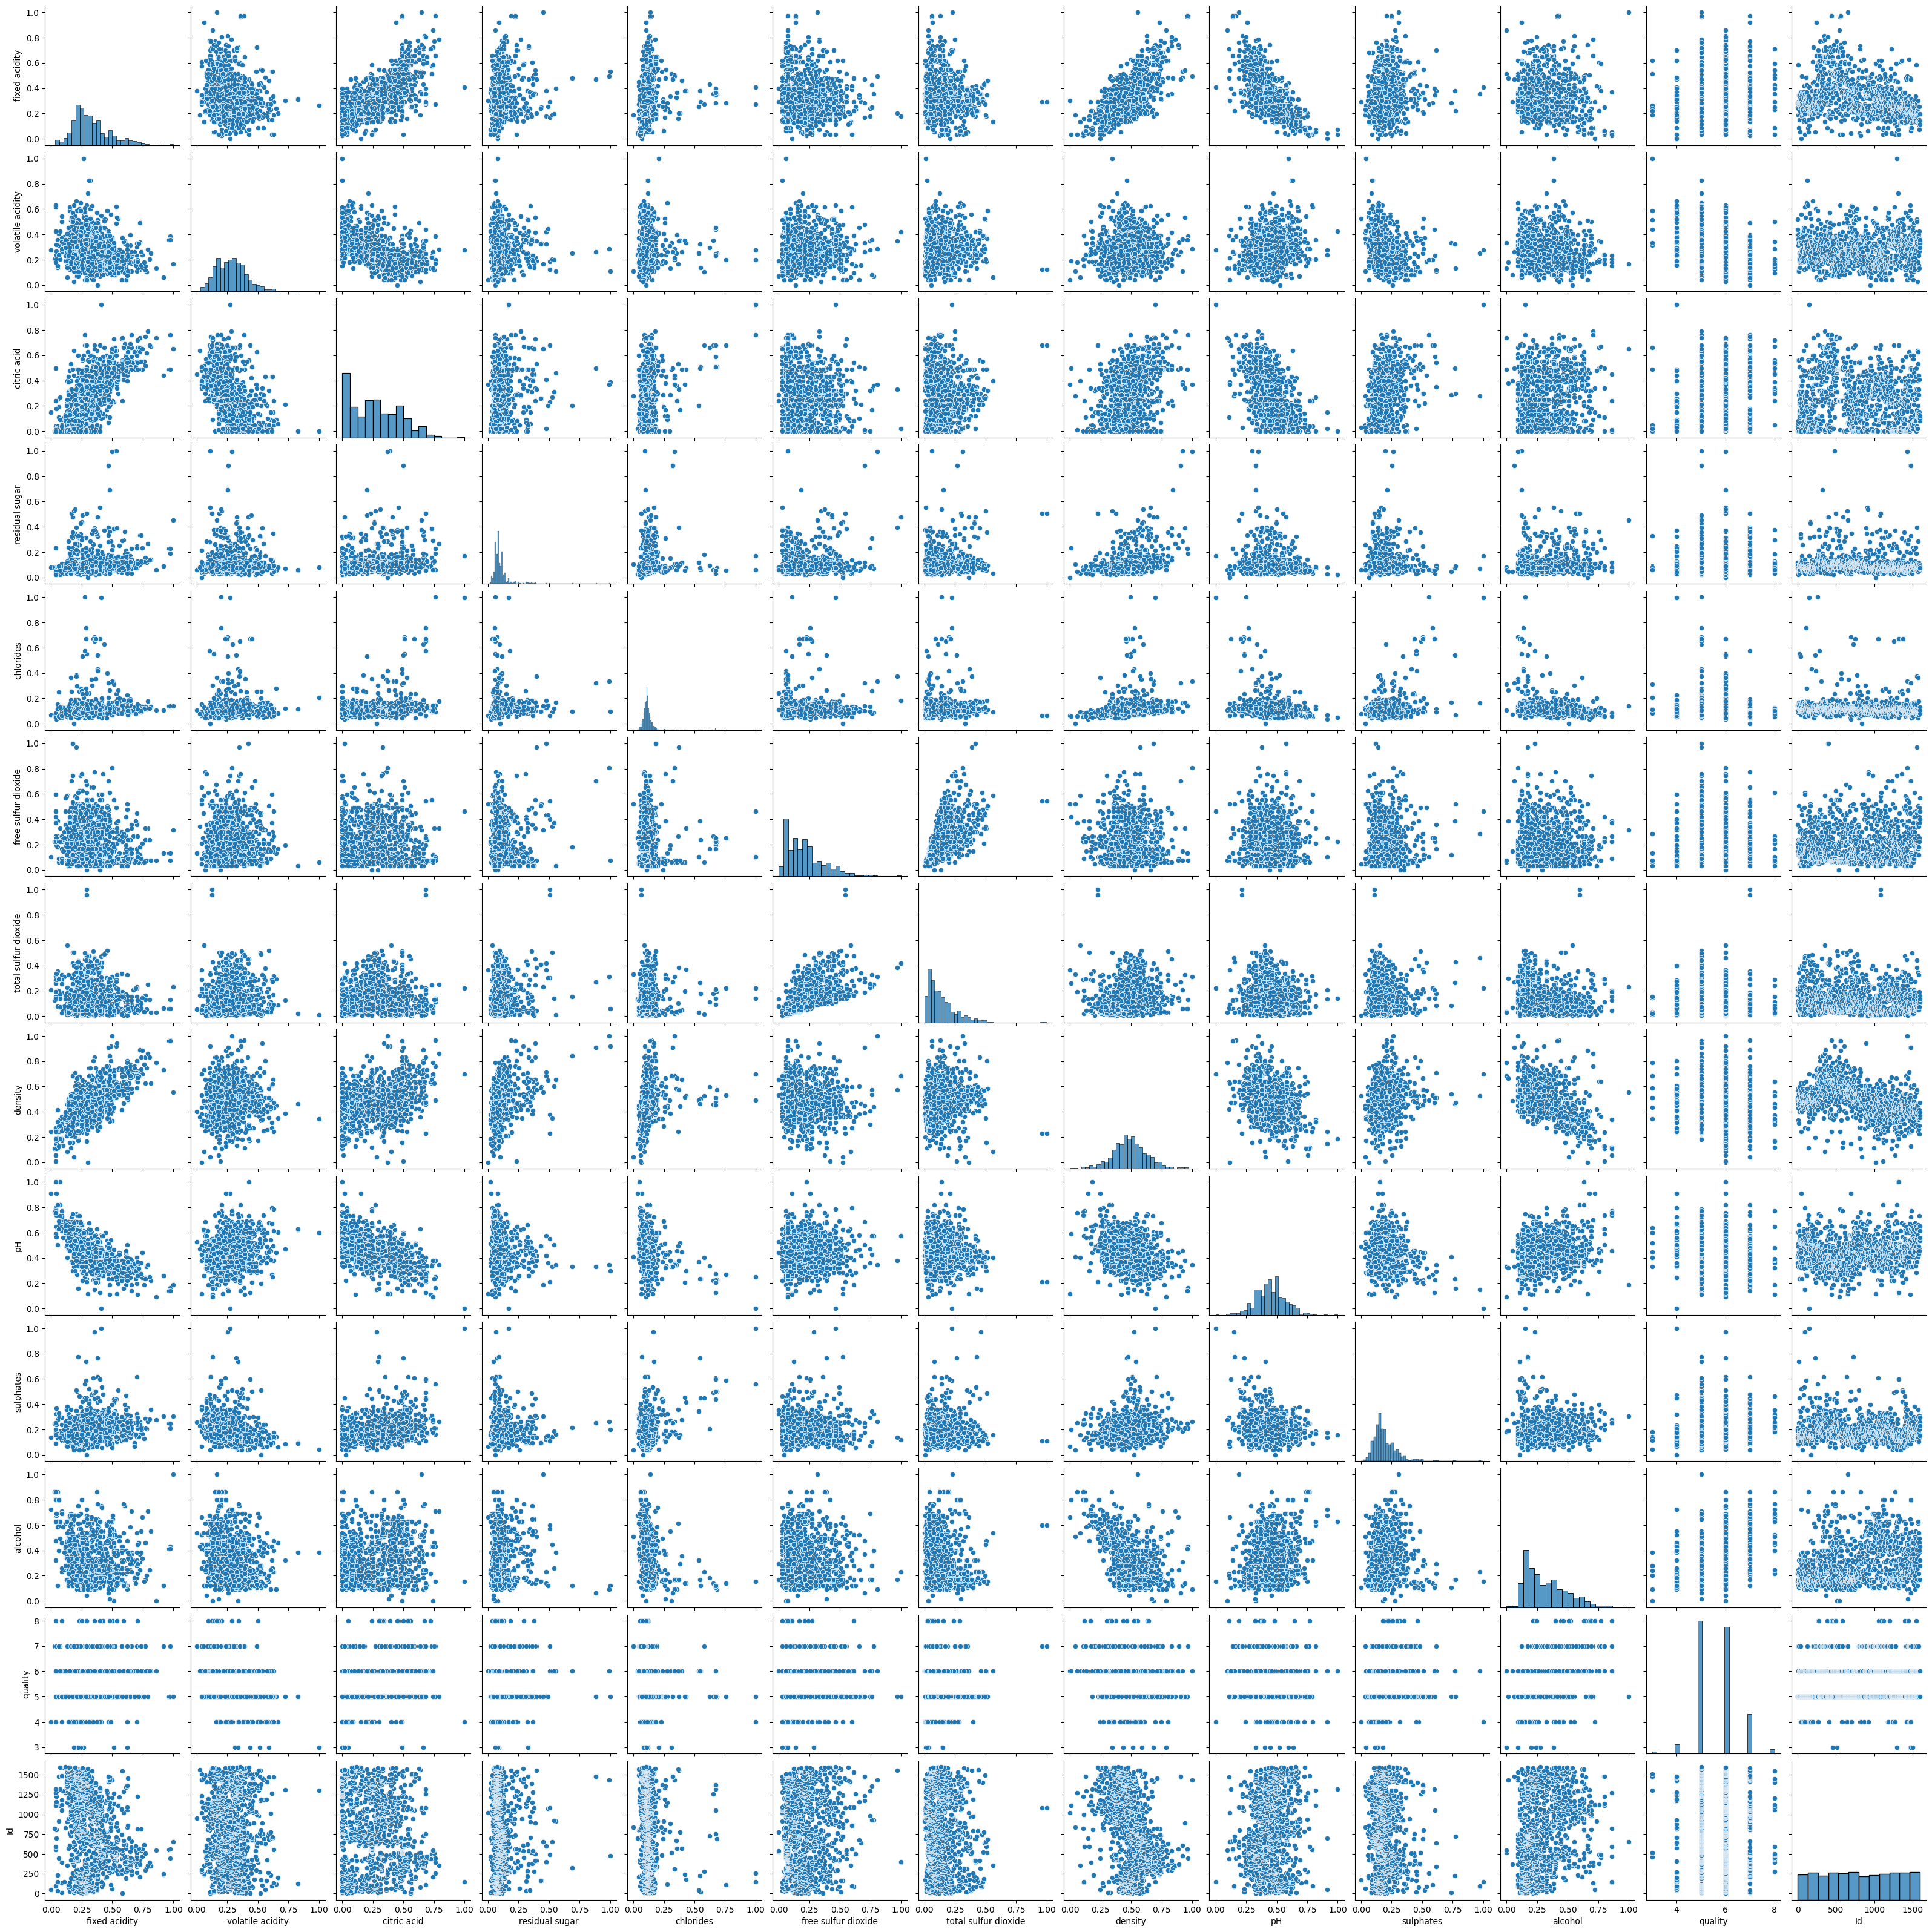

In [ ]:
# visualize relationship between pairs of input variables using scatter plots
sns.pairplot(wine)


Summarizing your analysis and observation

The histogram formed diagonally should be similar this is because of the self correlation but there in the hearmap shown above the histogram are different so there is some relationship.

# **TASK 2** - Classification/Regression

Performing following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarizing model's performance by evaluation metrices



Data Preprocessing

In [ ]:
#Seperate the data and labels
X = wine.drop('quality', axis = 1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00        0.068493   0.106845   
1          0.283186          0.520548         0.00        0.116438   0.143573   
2          0.283186          0.438356         0.04        0.095890   0.133556   
3          0.584071          0.109589         0.56        0.068493   0.105175   
4          0.247788          0.397260         0.00        0.068493   0.106845   
...             ...               ...          ...             ...        ...   
1138       0.150442          0.267123         0.13        0.095890   0.106845   
1139       0.194690          0.342466         0.08        0.068493   0.093489   
1140       0.141593          0.328767         0.08        0.075342   0.130217   
1141       0.115044          0.294521         0.10        0.089041   0.083472   
1142       0.115044          0.359589         0.12        0.075342   0.105175   

      free sulfur dioxide  

Label Binerization

In [ ]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(Y)


0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train and Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


**Model Training**

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Model** **Evaluation**

In [ ]:
#accuracy on test data
X_test_predection = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predection, Y_test)

In [ ]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.925764192139738


**Building a Predictive System**

In [ ]:
input_data = (5.3,5.5,10.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7)

In [ ]:
#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
